<a href="https://colab.research.google.com/github/allefbcc/cienciaDeDados/blob/main/%5BPET%5D%201%C2%B0%20Fase/%C3%81llef_Robson_Atividade_M%C3%B3dulo_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sobre a base de dados**

Os dados de rotatividade de clientes de telecomunicações contêm informações sobre uma empresa de telecomunicações fictícia que forneceu serviços de telefone residencial e Internet para 7.043 clientes na Califórnia.

**Dicionário de dados**


* CustomerId: Customer Id
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1.0)
* Partner: Whether the customer has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No) (child, mother, father...)
* tenure: The number of months the customer stays in the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has broadcast TV (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract period (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount collected from the customer monthly
* TotalCharges: Total amount collected from the customer
* Churn: Yes = the customer left the company this Month. No = the customer remained with the company.

#### **Faça uma análise exploratoria da base de dados. Utilize das técnicas que aprendeu nas aulas para analisar como os dados estão distribuidos e quais as relações entre eles. Elabore perguntas que podem ser respondidas através dessa análise e justifique suas respostas com base nos dados.**

*Nesta atividade será avaliada sua habilidade de aplicar comandos do pandas para extrair conhecimento dos dados, assim como sua resposta para cada questão levantada.*




Exemplo de perguntas que podem ser respondidas:



* Qual a porcentagem de clientes que cancelaram o serviço (churn)?
* Qual a distribuição dos clientes por gênero, idade (SeniorCitizen), estado civil (Partner), dependentes (Dependents)?
* Qual a média, mediana e desvio padrão da permanência na empresa (tenure) e dos valores mensais (MonthlyCharges) e totais (TotalCharges)?
* Clientes do gênero masculino ou feminino têm maior propensão ao churn?
* Clientes idosos (SeniorCitizen) tendem a cancelar o serviço com mais frequência?
* Clientes casados (Partner) ou com dependentes (Dependents) apresentam taxas de churn diferentes?
* Existe alguma relação entre o número de linhas telefônicas (MultipleLines) e o churn?
* Clientes com internet de fibra óptica (Fiber optic) cancelam menos que os demais?
* Serviços adicionais como segurança online (OnlineSecurity), backup online (OnlineBackup) e proteção de dispositivos (DeviceProtection) afetam a taxa de churn?
* O tipo de contrato (Month to month, One year, Two years) influencia na permanência do cliente?
* Qual a proporção de clientes que possui telefone fixo (PhoneService)?
* Quantos clientes possuem internet (InternetService) e qual a distribuição entre os tipos (DSL, Fiber optic)?
* Qual a porcentagem de clientes que utiliza serviços de streaming (StreamingTV, StreamingMovies)?
* Existe alguma relação entre o valor mensal faturado (MonthlyCharges) e o churn?
* O valor total faturado (TotalCharges) está associado a propensão do cliente cancelar o serviço?
* Qual o método de pagamento mais utilizado pelos clientes (Electronic check, Postal check, Bank transfer, Credit card)?
* Existe alguma relação entre o método de pagamento e o churn?
* Clientes com fatura eletrônica (PaperlessBilling) tendem a cancelar menos?


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
path = 'https://raw.githubusercontent.com/profEraylson/datasets/main/churn_telecom.csv'

df = pd.read_csv(path)

### Respondendo as Perguntas

1 - Qual a porcentagem de clientes que cancelaram o serviço (churn)?

Com base no gráfico de pizza abaixo é possivel visualizar que 26.5% dos clientes cancelaram
o serviço de telecomunicações.

Obs:. A questão não pede a taxa de retenção que é de 73.5%, mas por completude, plotei no gráfico essa informação.

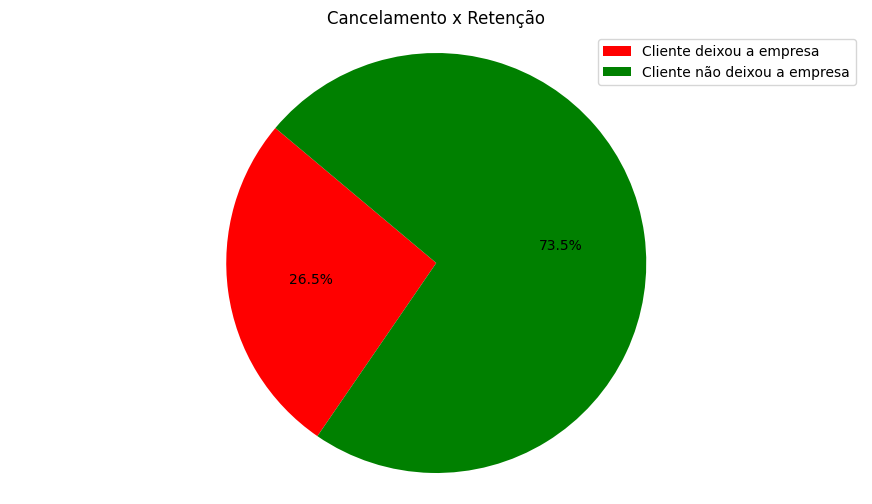

In [ ]:
total_churn_yes = df['Churn'].value_counts(normalize = True).mul(100).get("Yes").round(6)

total_churn_no = df['Churn'].value_counts(normalize = True).mul(100).get("No").round(6)


df_total_churn = pd.DataFrame({
    'Churn': ['Cliente deixou a empresa', 'Cliente não deixou a empresa'],
    'Percentage': [total_churn_yes, total_churn_no]
})


labels = df_total_churn['Churn']
sizes = df_total_churn['Percentage']

colors = ['red', 'Green']

plt.figure(figsize=(11, 6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Cancelamento x Retenção')

plt.legend(loc='upper right', labels=labels)


plt.axis('equal')
plt.show()


In [ ]:
#Professor, depois de cada questão respondida deixei um bloco de código desses em branco pra delimitar as
#questões, pra ficar mais legível a separação delas

2 - Qual a distribuição dos clientes por gênero, idade (SeniorCitizen), estado civil (Partner), dependentes (Dependents)?

Por gênero:  existe uma leve maioria de clientes homens em relação a mulheres como clientes da empresa.

Por estado civil: Existe uma diferença considerável de clientes solteiros sendo maioria em relação a clienetes casados.

Por Idade: clientes que não são idosos estão em grande maioria em relação a idosos.

Por dependentes:  clientes que não são dependentes estão em grande maioria em relação quem tem dependentes.

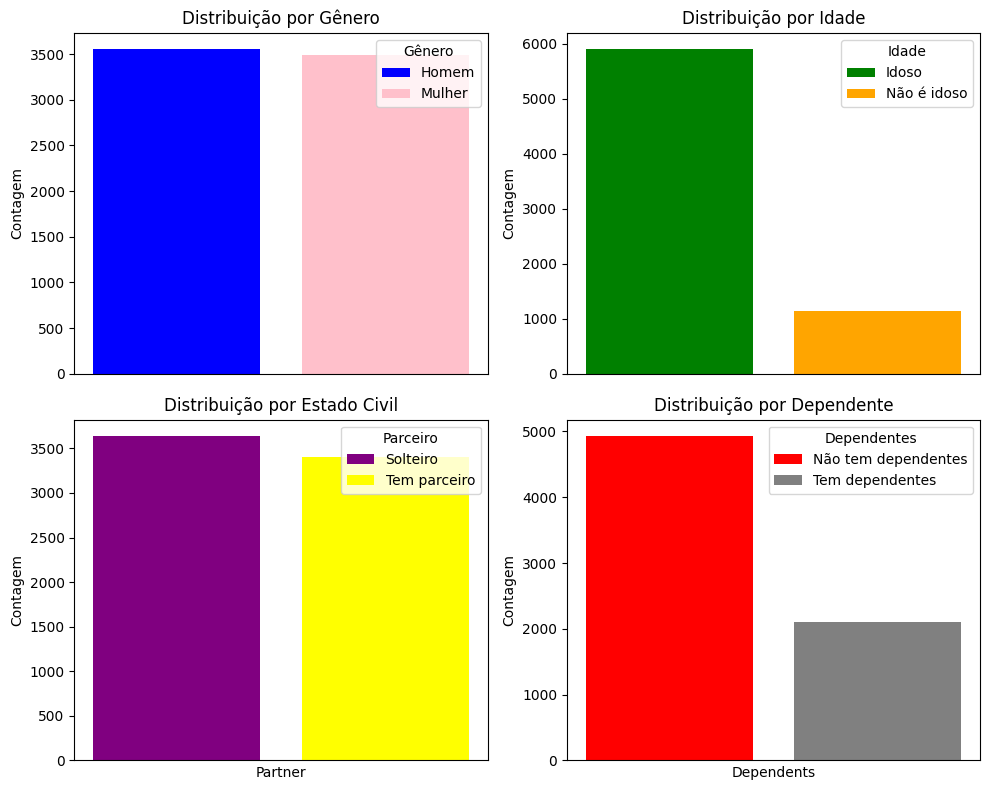

In [ ]:
dist_gender = df['gender'].value_counts()
dist_senior = df['SeniorCitizen'].value_counts()
dist_partner = df['Partner'].value_counts()
dist_dependents = df['Dependents'].value_counts()


fig, axs = plt.subplots(2, 2, figsize=(10, 8))


bars_gender = axs[0, 0].bar(dist_gender.index, dist_gender.values, color=['blue', 'pink'])
axs[0, 0].set_title('Distribuição por Gênero')
axs[0, 0].set_ylabel('Contagem')
axs[0, 0].legend(bars_gender, ['Homem', 'Mulher'], title='Gênero', loc='upper right')
axs[0, 0].set_xticks([])


bars_senior = axs[0, 1].bar(dist_senior.index, dist_senior.values, color=['green', 'orange'])
axs[0, 1].set_title('Distribuição por Idade')
axs[0, 1].set_ylabel('Contagem')
axs[0, 1].legend(bars_senior, ['Idoso', 'Não é idoso'], title='Idade', loc='upper right')
axs[0, 1].set_xticks([])

bars_partner = axs[1, 0].bar(dist_partner.index, dist_partner.values, color=['purple', 'yellow'])
axs[1, 0].set_title('Distribuição por Estado Civil')
axs[1, 0].set_xlabel('Partner')
axs[1, 0].set_ylabel('Contagem')
axs[1, 0].legend(bars_partner, ['Solteiro', 'Tem parceiro'], title='Parceiro', loc='upper right')
axs[1, 0].set_xticks([])


bars_dependents = axs[1, 1].bar(dist_dependents.index, dist_dependents.values, color=['red', 'gray'])
axs[1, 1].set_title('Distribuição por Dependente')
axs[1, 1].set_xlabel('Dependents')
axs[1, 1].set_ylabel('Contagem')
axs[1, 1].legend(bars_dependents, ['Não tem dependentes', 'Tem dependentes'], title='Dependentes', loc='upper right')
axs[1, 1].set_xticks([])


plt.tight_layout()
plt.show()


3 - Qual a média, mediana e desvio padrão da permanência na empresa (tenure) e dos valores mensais (MonthlyCharges) e totais (TotalCharges)?

Em relação a permanência do cliente com a empresa, ela está ruim, levando em consideração que uma empresa de telecomunicações é altamente competitiva, então manter essas estátisticas é algo que deve ser analisado para que possa melhorar, como por exemplo oferecendo mais serviços e promoções.

Em relação aos valores mensais, são valores muito bons de arrecadação mensal, suprindo mais que 50% e sobre o total os valores apresentados são positivos, levando em consideração as estatisticas de clientes que permanecem na empresa arrecadação total é satisfatória.

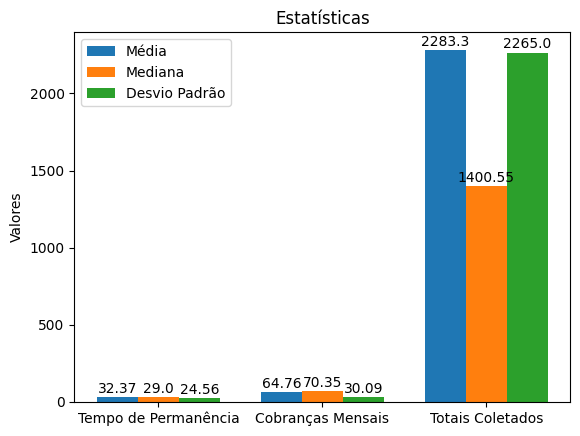

In [ ]:
columns = ['Tempo de Permanência', 'Cobranças Mensais', 'Totais Coletados']

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
media_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(media_total_charges, inplace=True)
estatistica_mean = df[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
estatistica_median = df[['tenure', 'MonthlyCharges', 'TotalCharges']].median()
estatistica_std = df[['tenure', 'MonthlyCharges', 'TotalCharges']].std()

fig, ax = plt.subplots()
largura_barra = 0.25

indices = range(len(columns))

bar1 = ax.bar(indices, estatistica_mean, largura_barra, label='Média')
bar2 = ax.bar([i + largura_barra for i in indices], estatistica_median, largura_barra, label='Mediana')
bar3 = ax.bar([i + 2 * largura_barra for i in indices], estatistica_std, largura_barra, label='Desvio Padrão')


for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_ylabel('Valores')
ax.set_title('Estatísticas')
ax.set_xticks([i + largura_barra for i in indices])
ax.set_xticklabels(columns)
ax.legend()


plt.show()


4 - Clientes do gênero masculino ou feminino têm maior propensão ao churn?

Os dois gêneros, possuem uma propensão quase igual de vir a deixar a empresa, mas analisando minusiosamente mulheres tem uma pequena propensão maior a isso.

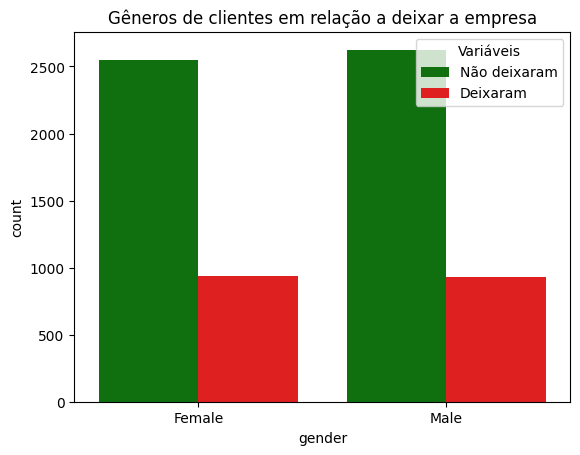

In [ ]:
colors = ["green", "red"]

plt.title('Gêneros de clientes em relação a deixar a empresa')
sns.countplot(data=df, x='gender', hue='Churn', palette=colors);
plt.legend(title='Variáveis', labels=['Não deixaram', 'Deixaram']);


5 - Clientes idosos (SeniorCitizen) tendem a cancelar o serviço com mais frequência?

Não, a quantidade de pessoas idosas que vieram a cancelar os serviços da empresa é bem baixa, quem tende a cancelar com mais frequência são as pessoas que não são idosas.

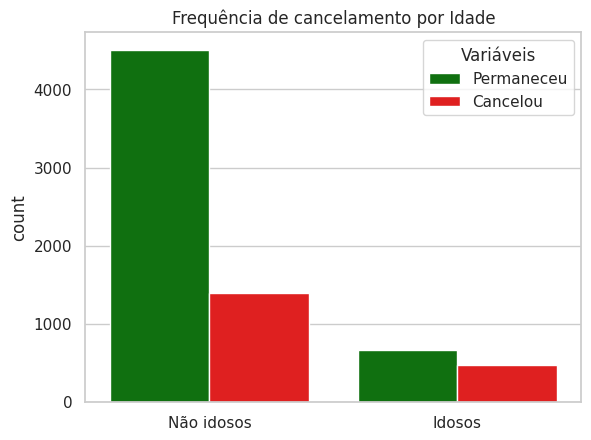

In [ ]:
colors = ['green', 'red']

ax = sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette=colors)
ax.set(xlabel=None)
plt.title('Frequência de cancelamento por Idade')
plt.legend(title='Variáveis', labels=['Permaneceu', 'Cancelou'], loc='upper right')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Não idosos', 'Idosos'])
plt.show()


6 - Clientes casados (Partner) ou com dependentes (Dependents) apresentam taxas de churn diferentes?

Minuciosamente apresentam taxas de cancelamento diferentes, mas são bem parecidas aproximadamente,a taxa de cancelamento por parte de casados gira em torno de quase 20% e a de dependentes a taxa é em torno de um pouco mais de 15%.

Obs.: para esse gráfico o melhor seria o gráfico de pizza, mas quando faço a plotagem, os valores saem incorretos, então
optei pelo gráfico de barras.

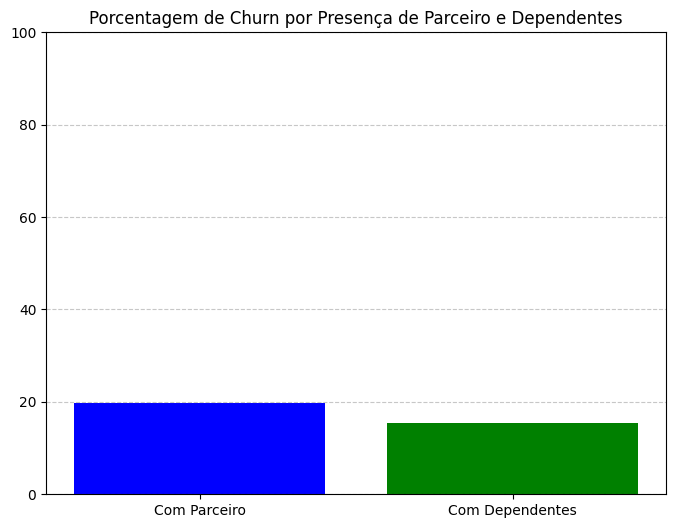

(19.66490299823633, 15.450236966824646)

In [ ]:
churn_partner = df[df['Partner'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']*100
churn_dependents = df[df['Dependents'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']*100

labels = ['Com Parceiro', 'Com Dependentes']
values = [churn_partner, churn_dependents]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Porcentagem de Churn por Presença de Parceiro e Dependentes')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



churn_partner, churn_dependents

7 - Existe alguma relação entre o número de linhas telefônicas (MultipleLines) e o churn?

Sim, clientes que possuem só uma linha telefônica elas tendem mais a não cancelar, cerca de quase 75% não cancelam, já em compração com quem tem mais de uma linha, cerca de um pouco mais de 71% tende a não cancelar.

Outra coisa a se observar em termos de cancelamento é que quem tem uma linha telefônica possui uma taxa menor (pouco mais de 25%) de cancelamento em
relação a quem tem mais de uma linha (cerca de quase 29%).

In [ ]:
churn_multiplelines = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()*100
churn_multiplelines.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_multiplelines = churn_multiplelines.applymap("{:.2f}%".format)


churn_multiplelines

,Não cancelou(%),Cancelou(%)
MultipleLines,,
No,74.96%,25.04%
No phone service,75.07%,24.93%
Yes,71.39%,28.61%


8 - Clientes com internet de fibra óptica (Fiber optic) cancelam menos que os demais?

Não, os clientes de fibra optica eles cancelam bem mais (cerca de quase 42%) que os clientes de DSL (cerca de quase 19%).

In [ ]:
churn_InternetService = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()*100
churn_InternetService.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_InternetService = churn_InternetService.applymap("{:.2f}%".format)

churn_InternetService

,Não cancelou(%),Cancelou(%)
InternetService,,
DSL,81.04%,18.96%
Fiber optic,58.11%,41.89%
No,92.60%,7.40%


9 - Serviços adicionais como segurança online (OnlineSecurity), backup online (OnlineBackup) e proteção de dispositivos (DeviceProtection) afetam a taxa de churn?

Sim, as taxas de cancelamento de clientes que usam esses serviços é bem baixa, que por sua vez fazem com que a permanência na empresa com uso desses serviços sejam bastante possitivas.

Clientes que usufruem da segurança online tem uma permanência de mais de 85%, já clientes que usam serviços de backup online tem uma permanência de mais de 78% e clientes que usam proteção de dispositivos tem uma permanência de mais de 77%.

In [ ]:
churn_OnlineSecurity = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack() *100
churn_OnlineSecurity.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_OnlineSecurity = churn_OnlineSecurity.applymap("{:.2f}%".format)

churn_OnlineBackup = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack() *100
churn_OnlineBackup.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_OnlineBackup = churn_OnlineBackup.applymap("{:.2f}%".format)

churn_DeviceProtection = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack() *100
churn_DeviceProtection.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_DeviceProtection = churn_DeviceProtection.applymap("{:.2f}%".format)

print("\n")
print(churn_OnlineSecurity)
print("\n")
print(churn_OnlineBackup)
print("\n")
print(churn_DeviceProtection)




                    Não cancelou(%) Cancelou(%)
OnlineSecurity                                 
No                           58.23%      41.77%
No internet service          92.60%       7.40%
Yes                          85.39%      14.61%


                    Não cancelou(%) Cancelou(%)
OnlineBackup                                   
No                           60.07%      39.93%
No internet service          92.60%       7.40%
Yes                          78.47%      21.53%


                    Não cancelou(%) Cancelou(%)
DeviceProtection                               
No                           60.87%      39.13%
No internet service          92.60%       7.40%
Yes                          77.50%      22.50%


10 - O tipo de contrato (Month to month, One year, Two years) influencia na permanência do cliente?

Sim, Influencia, clientes que possuem contratos de 1 ou 2 anos ele tendem a cancelar bem menos, já os clientes que possuem contratos mensais tendem a cancelar mais, inclusive a taxa de cancelamento dos clientes que tem contrato mensal é superior a soma da taxa de cancelamento de clientes que possuem contratos de 1 e 2 anos.

In [ ]:
churn_InternetService = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()*100
churn_InternetService.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_InternetService = churn_InternetService.applymap("{:.2f}%".format)

churn_InternetService


,Não cancelou(%),Cancelou(%)
Contract,,
Month-to-month,57.29%,42.71%
One year,88.73%,11.27%
Two year,97.17%,2.83%


11 - Qual a proporção de clientes que possui telefone fixo (PhoneService)?

Pouco mais de 90% dos clientes possuem telefone fixo enquanto quase 10% não possuem.

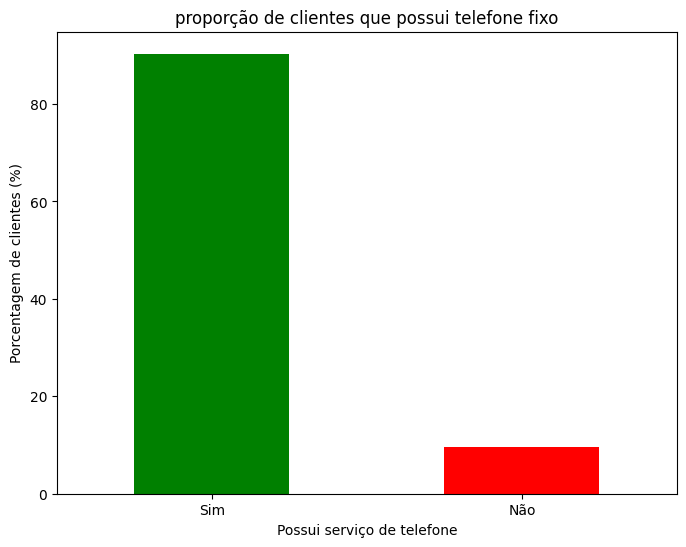

In [ ]:
churn_PhoneService = df['PhoneService'].value_counts(normalize=True)*100


plt.figure(figsize=(8, 6))
churn_PhoneService.plot(kind='bar', color=['green', 'red'])
plt.title('proporção de clientes que possui telefone fixo')
plt.xlabel('Possui serviço de telefone')
plt.ylabel('Porcentagem de clientes (%)')
plt.xticks(range(len(churn_PhoneService.index)), ['Sim', 'Não'], rotation=0)
plt.show()


12 - Quantos clientes possuem internet (InternetService) e qual a distribuição entre os tipos (DSL, Fiber optic)?

Primeiro gráfico: somados os clientes que usam fibra óptica e DSL, mais de 5500 clientes tem acesso a internet e sem acesso a internet tem mais de 1500 clientes.

Segundo gráfico: mais de 3000 clientes usam fibram óptica, enquanto a DSL quase 2500 clientes usam esse serviço e a quantidade de clientes sem internet é a mesma do primeiro gráfico.

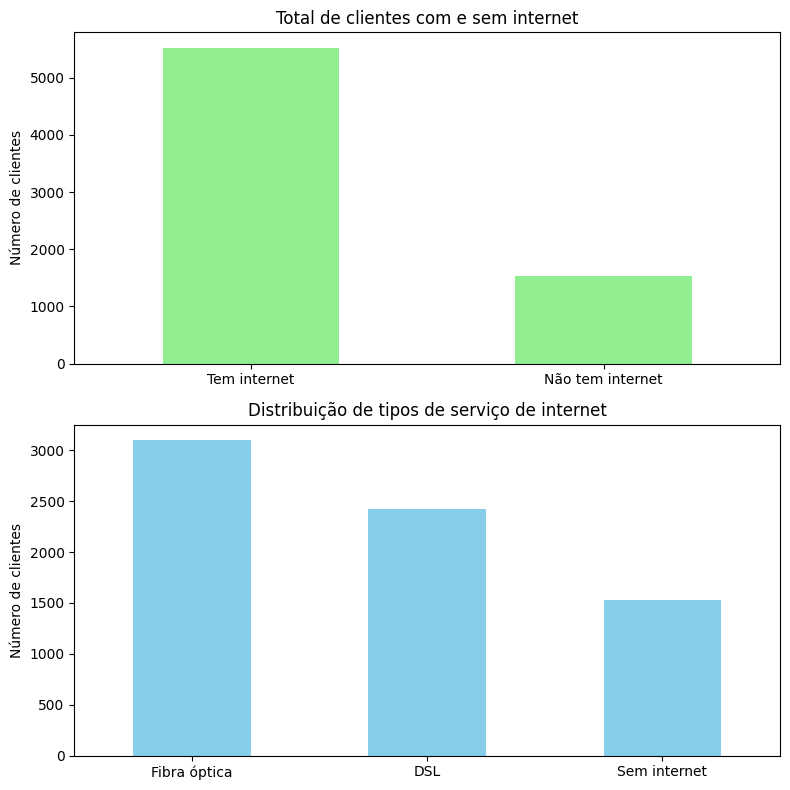

In [ ]:
dist_InternetService= df['InternetService'].value_counts()
clients_InternetService = df['InternetService'].apply(lambda x: 'Não tem internet' if x == 'No' else 'Tem internet').value_counts()

label_mapping = {'Fiber optic': 'Fibra óptica', 'DSL': 'DSL', 'No': 'Sem internet'}


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

clients_InternetService.plot(kind='bar', ax=axes[0], color='lightgreen')
axes[0].set_title('Total de clientes com e sem internet')
axes[0].set_ylabel('Número de clientes')
axes[0].tick_params(axis='x', rotation=0)

dist_InternetService.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Distribuição de tipos de serviço de internet')
axes[1].set_ylabel('Número de clientes')
axes[1].set_xticklabels([label_mapping[label] for label in dist_InternetService.index], rotation=0)


plt.tight_layout()
plt.show()


13 - Qual a porcentagem de clientes que utiliza serviços de streaming (StreamingTV, StreamingMovies)?

A porcentagem de pessoas que utilizam serviço de straming para as que não usam ou que não tem internet é quase igual.

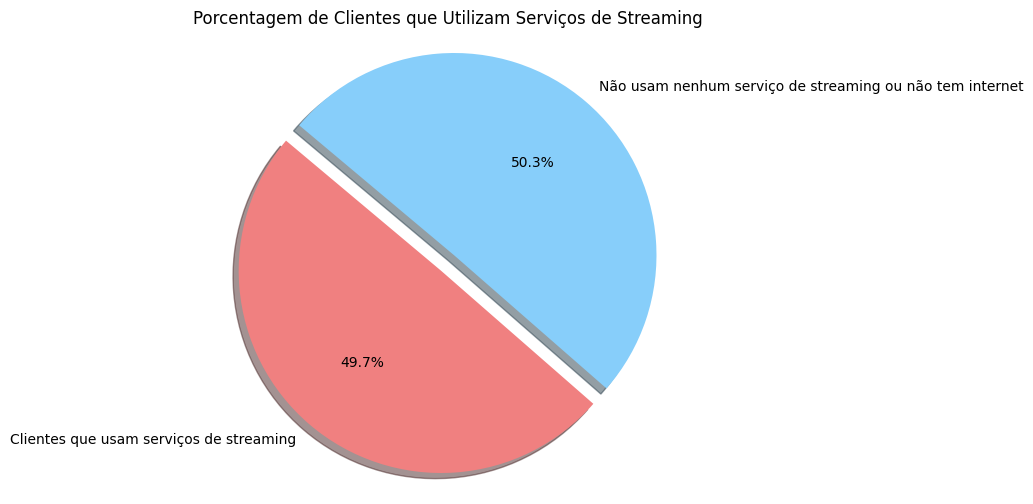

In [ ]:
clients_streaming_services = df[(df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')]

streaming_percentage = (len(clients_streaming_services)/len(df)) * 100

labels = ['Clientes que usam serviços de streaming', 'Não usam nenhum serviço de streaming ou não tem internet']
sizes = [streaming_percentage, 100 - streaming_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)


plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Porcentagem de Clientes que Utilizam Serviços de Streaming')
plt.show()


14 - Existe alguma relação entre o valor mensal faturado (MonthlyCharges) e o churn?

Analisando a média, mais de 74% das pessoas que pagam mensalmente não permaneceram como clientes, enquanto pouco mais de 61% permaneceram como clientes. Ou seja, quem paga mensalmente tendem mais a deixar a empresa.

Obs.: aqui também poderia ser um gráfico de pizzas, mas tive o mesmo problema da outra questão.

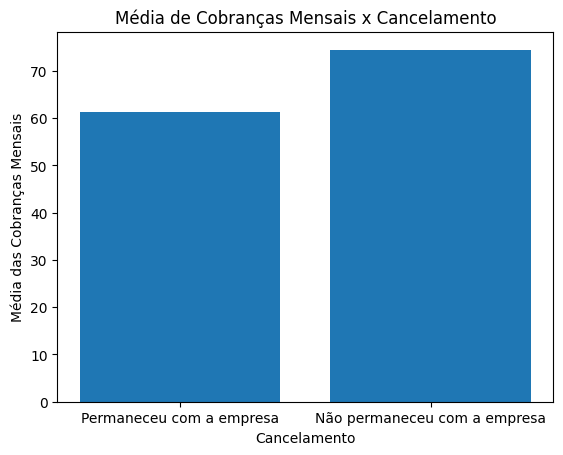

In [ ]:
relation_churn_monthlycharges = df.groupby('Churn')['MonthlyCharges'].mean()

churn_labels = relation_churn_monthlycharges.index
monthly_charges_means = relation_churn_monthlycharges.values


plt.bar(churn_labels, monthly_charges_means)


plt.title('Média de Cobranças Mensais x Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Média das Cobranças Mensais')
plt.xticks(churn_labels, ['Permaneceu com a empresa', 'Não permaneceu com a empresa'])
plt.show()


15 - O valor total faturado (TotalCharges) está associado a propensão do cliente cancelar o serviço?

Sim, Há uma grande quantidade de clientes que permanecem na empresa o que faz com que o valor arrecadado total seja alto e também mostra que a empresa atua bem na questão de manter esses clientes, em relaçãoa a propensão de deixar a empresa a quantidade é baixa em comparação com a quantidade de quem perrmanece com ela.

In [ ]:
relation_churn_totalcharges = df.groupby('Churn')['TotalCharges'].describe()

relation_churn_totalcharges


,count,unique,top,freq
Churn,,,,
No,5174,4966,,11
Yes,1869,1732,20.2,6


16 - Qual o método de pagamento mais utilizado pelos clientes (Electronic check, Postal check, Bank transfer, Credit card)?

Electronic check é o método mais utilizado pelos clientes.

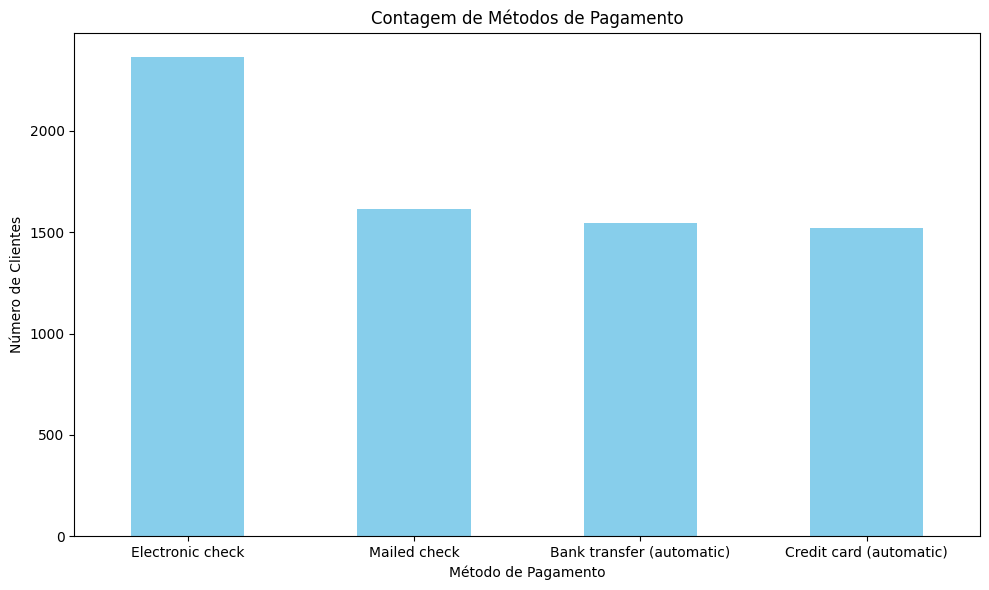

In [ ]:
clients_payment_method = df['PaymentMethod'].value_counts()

plt.figure(figsize=(10, 6))
clients_payment_method.plot(kind='bar', color='skyblue')
plt.title('Contagem de Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

17 - Existe alguma relação entre o método de pagamento e o churn?

Pessoas que utilizam o método de pagamento por cheque eletrônico cancelam mais os serviços da empresa e o método de pagamento o qual a maioria dos clientes permanecem na empresa pagando é o cartão de crédito.

In [ ]:
churn_PaymentMethod = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()*100
churn_PaymentMethod.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_PaymentMethod = churn_PaymentMethod.applymap("{:.2f}%".format)

churn_PaymentMethod


,Não cancelou(%),Cancelou(%)
PaymentMethod,,
Bank transfer (automatic),83.29%,16.71%
Credit card (automatic),84.76%,15.24%
Electronic check,54.71%,45.29%
Mailed check,80.89%,19.11%



18 - Clientes com fatura eletrônica (PaperlessBilling) tendem a cancelar menos?

Não, quem possui fatura eletrônica tende a cancelar mais, cerca de 33.57% enquanto clientes que não utilizam fatura eletrônica cancelam cerca de 16.33%.

In [ ]:
churn_PaperlessBilling= df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()*100
churn_PaperlessBilling.columns = ['Não cancelou(%)', 'Cancelou(%)']
churn_PaperlessBilling = churn_PaperlessBilling.applymap("{:.2f}%".format)

churn_PaperlessBilling

,Não cancelou(%),Cancelou(%)
PaperlessBilling,,
No,83.67%,16.33%
Yes,66.43%,33.57%
